In [1]:
import pandas, numpy, umap
import matplotlib, matplotlib.pyplot
import scipy, scipy.stats
import statsmodels, statsmodels.api
import sklearn, sklearn.preprocessing, sklearn.decomposition

matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14})
matplotlib.rcParams['pdf.fonttype']=42 

In [2]:
def histogrammer(theData):

    '''
    This function creates a histogram.
    '''    

    x=[]; y=[]
    
    binSize=0.1
    left=0
    right=5
    rightBins=numpy.arange(left+binSize,right+binSize,binSize)
    n,bins=numpy.histogram(theData,bins=rightBins)

    halfBin=(bins[1]-bins[0])/2.
    for bin in bins:
        center=bin+halfBin
        x.append(center)
    x.pop()
    y=numpy.array(n)
    y=list(y/float(sum(y)))

    return x,y

In [3]:
def regressionAnalysis(x,y):

    '''
    This function performs regression analysis based on:
    http://markthegraph.blogspot.com/2015/05/using-python-statsmodels-for-ols-linear.html
    '''
    
    # f.0 run a simple correlation analysis
    print('\t regression results:')
    slope,intercept,r_value,p_value,std_err=scipy.stats.linregress(x,y)
    print('\t\t slope',slope)
    print('\t\t intercept',intercept)
    print('\t\t r_value',r_value)
    print('\t\t pvalue',p_value)
    print('\t\t std_err',std_err)

    # f.1. build regression model
    xc=statsmodels.api.add_constant(x) # constant intercept term
    model=statsmodels.api.OLS(y,xc)
    fitted=model.fit()

    # f.2. interpolate model
    a=x.min()
    b=x.max()
    x_pred=numpy.linspace(a,b,250)
    x_pred2=statsmodels.api.add_constant(x_pred)
    y_pred=fitted.predict(x_pred2)
    regressionLine=[x_pred,y_pred]

    # f.3. compute CI
    y_hat=fitted.predict(xc)
    y_err=y-y_hat
    mean_x=xc.T[1].mean()
    n=len(xc)
    dof=n-fitted.df_model-1
    t=scipy.stats.t.ppf(1-0.025,df=dof)
    s_err=numpy.sum(numpy.power(y_err, 2))
    conf = t * numpy.sqrt((s_err/(n-2))*(1.0/n + (numpy.power((x_pred-mean_x),2) / ((numpy.sum(numpy.power(x_pred,2))) - n*(numpy.power(mean_x,2))))))
    upper=y_pred+abs(conf)
    lower=y_pred-abs(conf)
    CI=[upper,lower]

    # f.4. compute PI
    sdevP,lowerP,upperP=statsmodels.sandbox.regression.predstd.wls_prediction_std(fitted,exog=x_pred2,alpha=0.05)
    PI=[upperP,lowerP]

    return regressionLine, CI, PI

# 0. user-defined variables

In [4]:
expression_file = '/Volumes/sand/vigur/results/expression/experiment2.expression.txt'

In [5]:
# 1. read file

In [6]:
df = pandas.read_csv(expression_file,sep='\t',index_col=0)
df = df.T

print(df.shape)
df.head(n=30)

(27, 228297)


transcriptID,ENST00000631435.1,ENST00000434970.2,ENST00000448914.1,ENST00000415118.1,ENST00000632684.1,ENST00000604446.1,ENST00000603693.1,ENST00000603935.1,ENST00000604102.1,ENST00000604838.1,...,ENST00000633733.1,ENST00000631886.1,ENST00000631433.1,ENST00000635424.1,ENST00000636700.1,ENST00000636741.1,ENST00000637143.1,ENST00000638064.1,ENST00000636142.1,ENST00000626616.2
RSS_HLMV1_time00_treatment00.0_replicate1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.091267,0.091267,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
RSS_HLMV2_time00_treatment00.0_replicate2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.309039,0.000000,0.000000,0.0,0.0,0.000000,0.311619,0.0,0.0,0.000000
RSS_HLMV3_time00_treatment00.0_replicate3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.183107,0.000000,0.124794,0.0,0.0,0.000000,0.358807,0.0,0.0,0.374595
RSS_HLMV4_time04_treatment00.0_replicate1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068116,0.000000,0.142400,0.0,0.0,0.000000,0.281920,0.0,0.0,0.000000
RSS_HLMV5_time04_treatment00.0_replicate2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
RSS_HLMV6_time04_treatment00.0_replicate3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.168814,0.017183,0.017183,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
RSS_HLMV7_time04_treatment00.5_replicate1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.063292,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
RSS_HLMV8_time04_treatment00.5_replicate2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.178240,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
RSS_HLMV9_time04_treatment00.5_replicate3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.076944,0.0,0.0,0.000000
RSS_HLMV10_time04_treatment05.0_replicate1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.128415,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


# 2. data exploration

## 2.1. expression distributions

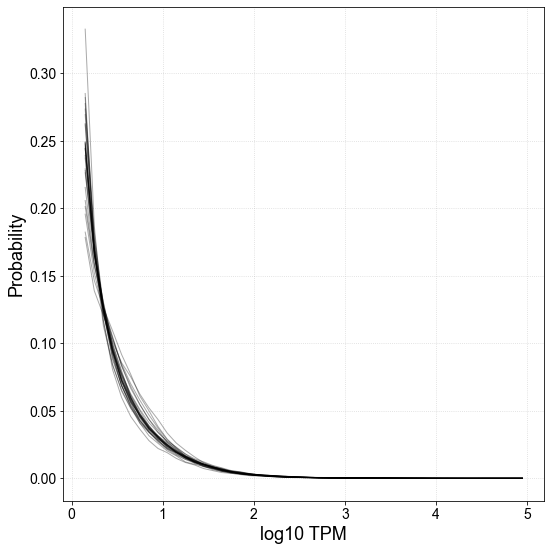

In [7]:
matplotlib.pyplot.figure(None, (8,8))
for element in df.index:
    the_data = numpy.log10(numpy.array(df.loc[element])+1)
    x, y = histogrammer(the_data)
    matplotlib.pyplot.plot(x,y,'-',color='black',lw=1, alpha=1/3)

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.xlabel('log10 TPM')
matplotlib.pyplot.ylabel('Probability')
matplotlib.pyplot.tight_layout()

## 2.1. define highly variable transcripts

In [8]:
# remove transcripts below average 5 TPMs
mean_values = df.mean(axis = 0)
df.loc['mean'] = mean_values
subset = df.loc[:, df.loc['mean'] >= 5]
subset.drop('mean', inplace=True)

print(df.shape)
print(subset.shape)
subset.tail()

(28, 228297)
(27, 17423)


/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


transcriptID,ENST00000419783.3,ENST00000419349.2,ENST00000361390.2,ENST00000361453.3,ENST00000361624.2,ENST00000361739.1,ENST00000361851.1,ENST00000361899.2,ENST00000362079.2,ENST00000361227.2,...,ENST00000490461.3,ENST00000612077.1,ENST00000616888.1,ENST00000463779.3,ENST00000582502.2,ENST00000613708.1,ENST00000577215.2,ENST00000579283.2,ENST00000583862.2,ENST00000621376.1
RSS_HLMV23_time24_treatment05.0_replicate2,754.836,5.51177,1355.180,1154.450,4514.52,7170.88,431.812,2249.29,4718.00,3205.28,...,3.06331,8.25836,6.76254,13.99040,4.92862,6.72048,6.26802,10.21090,2.40969,5.39932
RSS_HLMV24_time24_treatment05.0_replicate3,550.379,4.88327,1365.250,1340.850,6193.57,7057.82,2059.130,2963.31,5616.70,3827.01,...,5.91886,9.86794,7.10396,17.61390,11.65280,10.10220,5.44826,29.45880,2.99016,8.14817
RSS_HLMV25_time24_treatment50.0_replicate1,381.141,4.75852,1087.950,1689.340,5320.11,8939.93,1542.800,4230.41,5283.86,3524.81,...,11.20390,9.72602,14.19730,17.58340,15.21770,6.34147,4.57190,13.45820,10.42460,7.05249
RSS_HLMV26_time24_treatment50.0_replicate2,359.709,2.97051,549.995,616.646,4169.49,3246.89,1249.320,1334.23,3167.44,2037.12,...,2.03336,6.57716,1.90284,5.62447,4.25186,4.24853,5.67352,8.49313,1.41621,2.08909
RSS_HLMV27_time24_treatment50.0_replicate3,593.954,5.08333,1418.160,1054.540,6847.87,5126.68,2024.590,2176.71,5225.56,3514.97,...,1.49334,4.66383,2.51450,4.96952,3.86512,3.90952,5.40195,8.00360,3.04755,2.98057


In [9]:
# remove noisy transcripts, i.e., average rsem > 0.3
sample_names = []
for sample_name in subset.index:
    if '_' in sample_name:
        broken = sample_name.split('_')
        new_label = '_'.join(broken[2:-1]) # this line selects working labels
        sample_names.append(new_label)
unique = list(set(sample_names))
unique.sort()
print(unique)
print()

grouped_replicates = []
for label in unique:
    g = [element for element in subset.index if label in element]
    print(len(g), g)
    grouped_replicates.append(g)
    
noisy_transcripts = []
for transcript in subset.columns:
    rsems = []
    for working_samples in grouped_replicates:
        values = subset.loc[working_samples,transcript]
        v = numpy.array(values)
        v
        
        average=numpy.median(v)
        sem=numpy.std(v)/numpy.sqrt(len(v))
        rsem=sem/numpy.mean(v)
        
        rsems.append(rsem)
    
    if numpy.mean(rsems) > 0.3:
        noisy_transcripts.append(transcript)

print(len(noisy_transcripts), 'noisy transcripts')
print(subset.shape)
subset.drop(columns=noisy_transcripts, inplace=True)
print(subset.shape)
subset.head()

['time00_treatment00.0', 'time04_treatment00.0', 'time04_treatment00.5', 'time04_treatment05.0', 'time04_treatment50.0', 'time24_treatment00.0', 'time24_treatment00.5', 'time24_treatment05.0', 'time24_treatment50.0']

3 ['RSS_HLMV1_time00_treatment00.0_replicate1', 'RSS_HLMV2_time00_treatment00.0_replicate2', 'RSS_HLMV3_time00_treatment00.0_replicate3']
3 ['RSS_HLMV4_time04_treatment00.0_replicate1', 'RSS_HLMV5_time04_treatment00.0_replicate2', 'RSS_HLMV6_time04_treatment00.0_replicate3']
3 ['RSS_HLMV7_time04_treatment00.5_replicate1', 'RSS_HLMV8_time04_treatment00.5_replicate2', 'RSS_HLMV9_time04_treatment00.5_replicate3']
3 ['RSS_HLMV10_time04_treatment05.0_replicate1', 'RSS_HLMV11_time04_treatment05.0_replicate2', 'RSS_HLMV12_time04_treatment05.0_replicate3']
3 ['RSS_HLMV13_time04_treatment50.0_replicate1', 'RSS_HLMV14_time04_treatment50.0_replicate2', 'RSS_HLMV15_time04_treatment50.0_replicate3']
3 ['RSS_HLMV16_time24_treatment00.0_replicate1', 'RSS_HLMV17_time24_treatment00.0_repl

/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


1420 noisy transcripts
(27, 17423)
(27, 16003)


/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


transcriptID,ENST00000419783.3,ENST00000419349.2,ENST00000361390.2,ENST00000361453.3,ENST00000361624.2,ENST00000361739.1,ENST00000361851.1,ENST00000361899.2,ENST00000362079.2,ENST00000361227.2,...,ENST00000490461.3,ENST00000612077.1,ENST00000616888.1,ENST00000463779.3,ENST00000582502.2,ENST00000613708.1,ENST00000577215.2,ENST00000579283.2,ENST00000583862.2,ENST00000621376.1
RSS_HLMV1_time00_treatment00.0_replicate1,798.771,7.08012,1534.19,1324.05,5448.90,8725.02,598.815,2563.93,5584.68,4879.41,...,3.60426,5.73852,1.29886,7.39666,4.94319,6.66537,3.95135,8.28947,2.90520,7.05738
RSS_HLMV2_time00_treatment00.0_replicate2,471.367,4.41215,1984.93,1572.08,7643.27,6423.20,2238.000,3177.66,5568.91,3866.53,...,9.34600,14.52270,8.08805,24.27730,16.02100,19.66020,7.74644,23.36980,5.47147,13.22350
RSS_HLMV3_time00_treatment00.0_replicate3,334.028,4.79883,1907.96,1763.53,7827.74,6946.93,2990.340,3485.64,5972.60,3806.69,...,8.81222,19.40150,9.22216,26.42770,11.39540,24.76050,11.03690,33.31710,9.47226,18.98120
RSS_HLMV4_time04_treatment00.0_replicate1,181.649,8.19977,3142.05,3883.79,6987.28,9224.72,5388.610,7855.57,6362.00,2401.93,...,26.16360,31.19510,19.51540,29.11430,28.35780,42.61610,15.79320,62.33670,21.91080,37.28740
RSS_HLMV5_time04_treatment00.0_replicate2,509.409,6.04387,1721.97,1258.48,7418.26,7271.62,1704.120,2281.30,6219.88,4607.76,...,5.44486,4.33762,2.00328,7.40273,2.87426,6.79422,1.73462,4.32164,7.07608,2.50886


In [10]:
print(subset.shape)

mean_values = subset.mean(axis = 0)
std_values = subset.std(axis = 0)
subset.loc['mean'] = mean_values
subset.loc['std'] = std_values
subset.loc['cv'] = subset.loc['std'] / subset.loc['mean']

print(subset.shape)
subset.tail()

# compute regression model
x = numpy.array(numpy.log10(subset.loc['mean']))
y = numpy.array(numpy.log10(subset.loc['std']))
regressionLine, CI, PI = regressionAnalysis(x, y)

(27, 16003)
(30, 16003)
	 regression results:
		 slope 0.8878773324932832
		 intercept -0.2870099341947778
		 r_value 0.9147816757807918
		 pvalue 0.0
		 std_err 0.003099474556833009


/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in sqrt


In [11]:
# identify highly variable transcripts
HVTs=[]; HVT_positions_x=[]; HVT_positions_y=[]
VTs=[]; VT_positions_x=[]; VT_positions_y=[]
for i in range(len(x)):
    transcript_name = subset.columns[i]
    observed = y[i]
    closer_index = numpy.argmin([numpy.abs(x[i]-probe) for probe in regressionLine[0]])
    expected = PI[0][closer_index]
    average = regressionLine[1][closer_index]
    
    if observed > expected:
        HVTs.append(transcript_name)
        HVT_positions_x.append(x[i]); HVT_positions_y.append(y[i])
        
    if observed > average:
        VTs.append(transcript_name)
        VT_positions_x.append(x[i]); VT_positions_y.append(y[i])

print(len(HVTs))
print(len(VTs))

293
7770


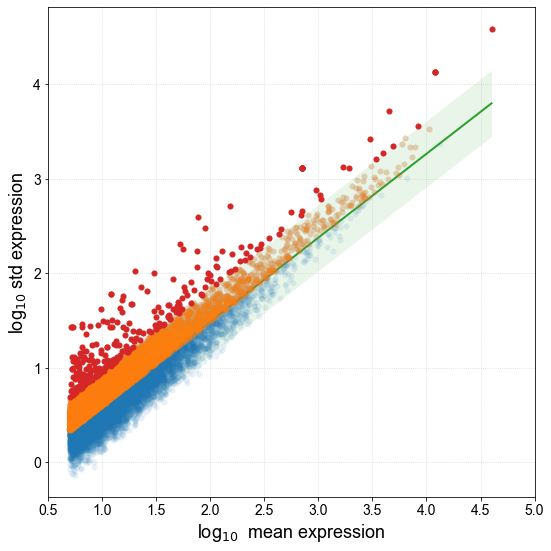

In [12]:
# plot
matplotlib.pyplot.figure(None, (8,8))

matplotlib.pyplot.plot(regressionLine[0], regressionLine[1], color='tab:green', lw=2)
matplotlib.pyplot.fill_between(regressionLine[0], PI[1], PI[0], color='tab:green', alpha=0.1, lw=0)
matplotlib.pyplot.plot(x, y, 'o', alpha=0.1, mew=0)
matplotlib.pyplot.plot(VT_positions_x, VT_positions_y, 'o', alpha=0.25, mew=0, color='tab:orange')
matplotlib.pyplot.plot(HVT_positions_x, HVT_positions_y, 'o', alpha=1, mew=0, color='tab:red')

matplotlib.pyplot.xlabel('log$_{10}$  mean expression')
matplotlib.pyplot.ylabel('log$_{10}$ std expression')
matplotlib.pyplot.xlim([0.5, 5])
matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

In [13]:
HV_df = subset.loc[:, HVTs]
HV_df.drop(['mean', 'std', 'cv'], inplace=True)

print(HV_df.shape)
HV_df.tail()

(27, 293)


transcriptID,ENST00000361851.1,ENST00000361335.1,ENST00000361381.2,ENST00000361567.2,ENST00000495224.1,ENST00000395323.9,ENST00000498722.2,ENST00000264187.7,ENST00000473565.5,ENST00000478899.1,...,ENST00000615941.1,ENST00000608521.5,ENST00000638356.1,ENST00000586474.1,ENST00000607338.1,ENST00000542022.1,ENST00000490232.3,ENST00000365328.1,ENST00000497848.2,ENST00000614637.1
RSS_HLMV23_time24_treatment05.0_replicate2,431.812,610.723,2822.45,450.434,30.8566,11.44100,10.07880,25.56780,0.539882,6.57182,...,2.290530,66.88370,57443.00,5.26782,6.66169,3.71550,7443.61,55.3735,9.17662,4.05588
RSS_HLMV24_time24_treatment05.0_replicate3,2059.130,1733.320,3625.52,764.070,29.4686,17.01550,3.35155,57.96650,2.170570,2.51734,...,3.376390,8.35875,23440.20,13.07910,5.35418,1.66373,10648.10,67.7770,21.31440,10.11430
RSS_HLMV25_time24_treatment50.0_replicate1,1542.800,1016.330,4842.44,358.785,152.0420,6.36102,44.78100,8.76454,0.000000,45.80710,...,6.683980,1.42102,8627.94,25.33370,10.47780,62.65160,5623.57,71.5915,99.69680,6.70869
RSS_HLMV26_time24_treatment50.0_replicate2,1249.320,1511.400,1888.93,482.386,26.0530,15.18790,3.47549,78.71030,3.501240,6.77286,...,1.199090,88.31560,78667.90,22.25310,2.32162,3.97967,8379.28,430.4700,11.03170,3.85739
RSS_HLMV27_time24_treatment50.0_replicate3,2024.590,2325.800,2829.62,988.810,12.4582,23.38260,2.53790,156.51000,4.527660,1.80905,...,0.922488,15.18730,25563.30,17.18350,3.61937,0.00000,6566.26,21.2652,8.10524,4.19289


## 2.2 log transformation

In [14]:
log2_HV_df = numpy.log2(HV_df+1)
log2_HV_df.head(n=30)

transcriptID,ENST00000361851.1,ENST00000361335.1,ENST00000361381.2,ENST00000361567.2,ENST00000495224.1,ENST00000395323.9,ENST00000498722.2,ENST00000264187.7,ENST00000473565.5,ENST00000478899.1,...,ENST00000615941.1,ENST00000608521.5,ENST00000638356.1,ENST00000586474.1,ENST00000607338.1,ENST00000542022.1,ENST00000490232.3,ENST00000365328.1,ENST00000497848.2,ENST00000614637.1
RSS_HLMV1_time00_treatment00.0_replicate1,9.228374,8.758816,11.402948,8.793555,5.587758,3.763369,4.705978,3.758772,1.680405,3.635418,...,1.671203,4.106348,13.971067,4.287812,1.376035,4.603751e+00,12.262482,2.417680e+00,3.307264,2.356166
RSS_HLMV2_time00_treatment00.0_replicate2,11.128639,11.540859,12.067145,10.790300,4.127097,4.586068,3.137744,6.896950,4.679108,2.413686,...,1.867893,4.716958,15.109496,4.085663,2.793677,0.000000e+00,13.078615,5.420085e+00,5.493724,4.101121
RSS_HLMV3_time00_treatment00.0_replicate3,11.546576,11.995265,12.407608,10.859286,4.930912,4.532872,3.070209,6.575202,4.886579,3.192073,...,1.390838,4.397762,14.844568,4.142863,3.367101,1.791514e+00,13.470239,0.000000e+00,4.514204,3.828571
RSS_HLMV4_time04_treatment00.0_replicate1,12.395965,12.260784,13.489748,11.085559,5.637402,5.171495,3.636497,6.093036,4.514072,3.260411,...,4.879529,5.103909,14.139040,4.893144,4.270656,1.706367e+00,13.894041,0.000000e+00,5.087985,4.710592
RSS_HLMV5_time04_treatment00.0_replicate2,10.735658,11.683183,11.682082,10.446256,4.070321,5.810623,2.205865,5.834506,4.399082,2.165902,...,2.328773,4.947984,14.238203,4.338795,0.586444,0.000000e+00,12.955523,0.000000e+00,2.860508,1.182826
RSS_HLMV6_time04_treatment00.0_replicate3,11.072267,11.892505,12.552354,10.684337,4.972578,5.778088,3.261442,5.860417,4.298402,3.407818,...,4.354798,4.831751,14.312472,4.363599,3.434799,2.542223e+00,13.602722,0.000000e+00,4.482177,4.699002
RSS_HLMV7_time04_treatment00.5_replicate1,9.876732,10.728082,12.075118,9.845371,5.583396,5.516542,4.501586,5.492013,3.348169,3.587413,...,4.636665,6.336119,15.612782,6.041968,4.771643,4.078738e+00,14.078218,4.990715e-08,5.527045,5.477797
RSS_HLMV8_time04_treatment00.5_replicate2,9.874559,10.005961,11.822157,9.599139,4.689478,6.323487,3.301160,5.207616,2.477183,2.680867,...,3.516519,6.007548,14.991925,5.795053,2.055227,0.000000e+00,13.362478,3.430336e+00,3.709346,3.475746
RSS_HLMV9_time04_treatment00.5_replicate3,9.820445,10.009969,11.754612,9.479317,5.320012,6.251312,3.502814,4.846298,2.701414,3.248101,...,3.634198,5.739500,14.546075,6.064465,2.521340,1.886070e+00,13.849464,6.679375e-08,4.679013,3.730042
RSS_HLMV10_time04_treatment05.0_replicate1,9.311428,9.446591,11.370431,9.126075,5.037914,5.991359,2.925688,4.616346,2.626395,2.994822,...,3.106318,7.551801,16.493322,6.169983,2.422333,3.091250e-01,13.208314,5.417782e+00,4.322051,1.974386


# 3. dimensionality reduction on highly-variant transcripts

In [15]:
standarized = sklearn.preprocessing.StandardScaler().fit_transform(log2_HV_df)
print(standarized.shape)
print(standarized[:,0], numpy.mean(standarized[:,0]), numpy.var(standarized[:,0]))

(27, 293)
[-1.22708944  0.75263335  1.18804637  2.07295175  0.34321996  0.693904
 -0.55162096 -0.55388486 -0.61026087 -1.14056221 -0.87883501 -0.68803944
  0.99675552  2.18814051  0.2054941  -1.97001087 -0.13756587  0.81933432
  0.05652167 -0.03826033 -0.15041362 -0.95324236 -1.71755164  0.62749153
  0.19383694 -0.1230709   0.60207836] 2.1382073066854866e-16 1.0


In [16]:
pca = sklearn.decomposition.PCA(n_components = 2)
PCs = pca.fit_transform(standarized)

print(PCs.shape)

(27, 2)


In [17]:
the_colors = []
for element in log2_HV_df.index:
    
    if 'treatment00.0' in element:        
        the_color = '0.5'
    elif 'treatment00.5' in element:
        the_color = 'tab:blue'
    elif 'treatment05.0' in element:
        the_color = 'tab:green'
    elif 'treatment50.0' in element:
        the_color = 'tab:red'
    else:
        print('error')
    the_colors.append(the_color)

the_markers = []
for element in log2_HV_df.index:
    
    if 'time00' in element:
        the_marker = '*'
    elif 'time04' in element:
        the_marker = 'o'
    elif 'time24' in element:
        the_marker = 's'
    else:
        print('error')
    the_markers.append(the_marker)

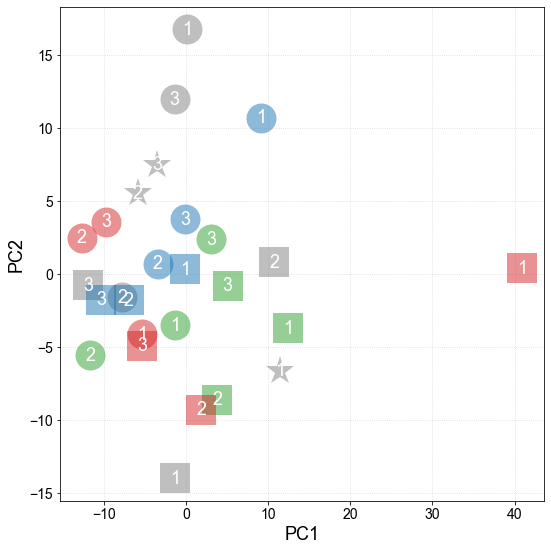

In [18]:
matplotlib.pyplot.figure(None, (8,8))
for i in range(PCs.shape[0]):
    matplotlib.pyplot.plot(PCs[i,0], PCs[i,1], marker=the_markers[i], color=the_colors[i], ms=30, alpha=0.5, mew=0)
    label = log2_HV_df.index[i][-1]
    matplotlib.pyplot.text(PCs[i,0], PCs[i,1], s=label, horizontalalignment='center', verticalalignment='center', color='w')
    
matplotlib.pyplot.xlabel('PC1')
matplotlib.pyplot.ylabel('PC2')
matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='cosine',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=3, negative_sample_rate=5, random_state=1,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Thu Mar 12 16:22:53 2020 Finding Nearest Neighbors
Thu Mar 12 16:22:53 2020 Finished Nearest Neighbor Search
Thu Mar 12 16:22:53 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Mar 12 16:22:53

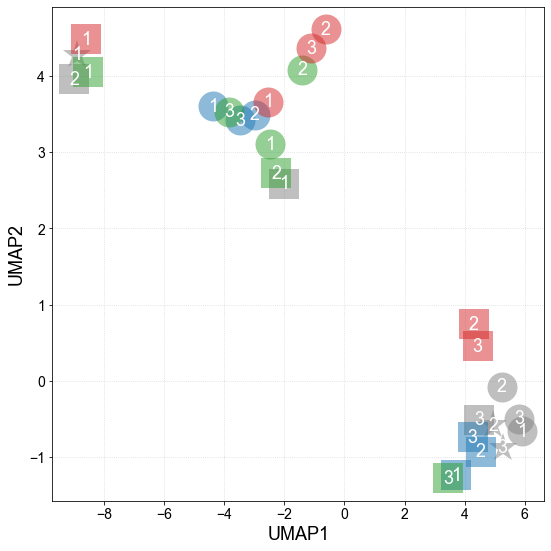

In [27]:
reducer = umap.UMAP(n_neighbors=3, metric='cosine', verbose=True, random_state=1)
embedding = reducer.fit_transform(log2_HV_df)

matplotlib.pyplot.figure(None, (8,8))
for i in range(embedding.shape[0]):
    matplotlib.pyplot.plot(embedding[i,0], embedding[i,1], marker=the_markers[i], color=the_colors[i], ms=30, alpha=0.5, mew=0)
    label = log2_HV_df.index[i][-1]
    matplotlib.pyplot.text(embedding[i,0], embedding[i,1], s=label, horizontalalignment='center', verticalalignment='center', color='w')
    
matplotlib.pyplot.xlabel('UMAP1')
matplotlib.pyplot.ylabel('UMAP2')
matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()